# Analisando histogramas de ruídos para detectação por IA

In [49]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [50]:
path_image = '../data/raw/raio_x_chest.png'
image = cv2.imread(path_image, cv2.IMREAD_GRAYSCALE)

Criando imagem "suja"

In [51]:
# Gaussiano
# media = 0, desvio padrão = 50
mean = 0
std_dev = 50
gaussian_noise = np.random.normal(mean, std_dev, image.shape)
noisy_image_gaussian = cv2.add(image.astype(np.float64), gaussian_noise).astype(np.uint8)

Histograma gaussiano

In [52]:
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_gaussian = cv2.calcHist([noisy_image_gaussian], [0], None, [256], [0, 256])

Utilizando gaussiano e mediana para melhorar a imagem

In [53]:
# Primeiro o gaussiano -> teoricamente "correto"
cleaned_gaussian = cv2.GaussianBlur(noisy_image_gaussian, (15, 15), 0)

# Mediana -> teoricamente "errado"
cleaned_median = cv2.medianBlur(noisy_image_gaussian, ksize=7)

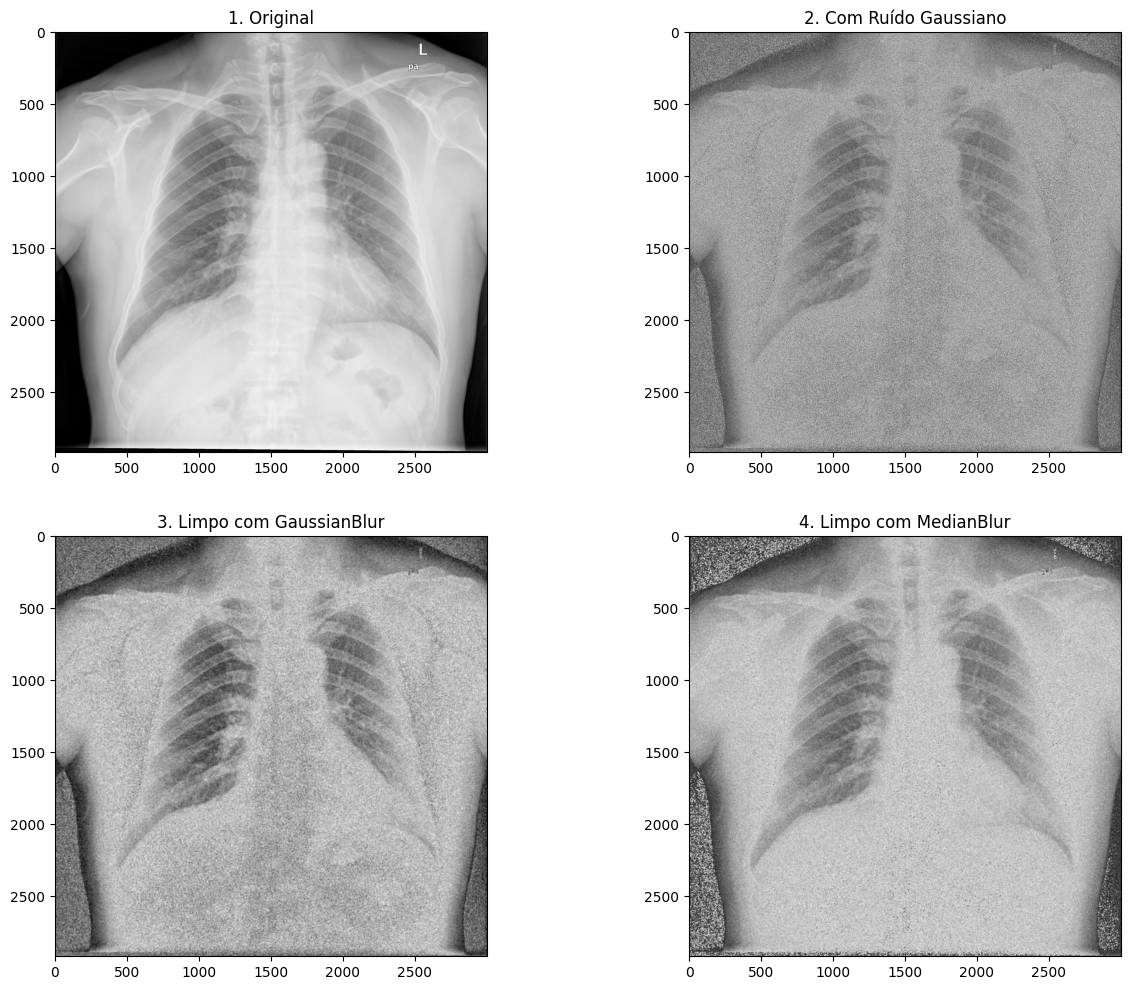

In [54]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('1. Original')

plt.subplot(2, 2, 2)
plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('2. Com Ruído Gaussiano')

plt.subplot(2, 2, 3)
plt.imshow(cleaned_gaussian, cmap='gray')
plt.title('3. Limpo com GaussianBlur')

plt.subplot(2, 2, 4)
plt.imshow(cleaned_median, cmap='gray')
plt.title('4. Limpo com MedianBlur')

plt.savefig('../data/processed/analise_filtros.png')

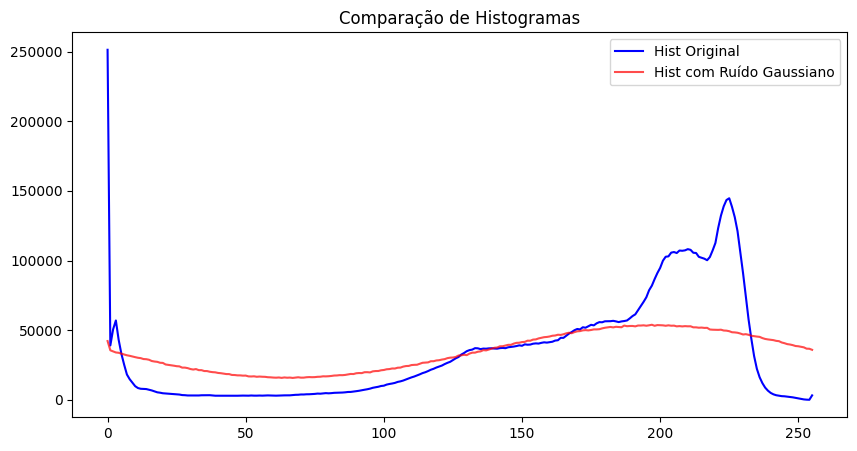

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(hist_original, color='blue', label='Hist Original')
plt.plot(hist_gaussian, color='red', alpha=0.7, label='Hist com Ruído Gaussiano')
plt.title('Comparação de Histogramas')
plt.legend()
plt.show()

CRIANDO IMAGEM SUJA "SAL E PIMENTA"

In [56]:
noisy_image_sp = image.copy()
num_pixels = noisy_image_sp.size
num_salt = int(0.05 * num_pixels / 2)
num_pepper = int(0.05 * num_pixels / 2)
salt_coords = [np.random.randint(0, i - 1, num_salt) for i in noisy_image_sp.shape]
noisy_image_sp[salt_coords[0], salt_coords[1]] = 255
pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in noisy_image_sp.shape]
noisy_image_sp[pepper_coords[0], pepper_coords[1]] = 0

In [57]:
hist_noisy_sp = cv2.calcHist([noisy_image_sp], [0], None, [256], [0, 256])

In [58]:
cleaned_gaussian_sp = cv2.GaussianBlur(noisy_image_sp, (7, 7), 0)
cleaned_median_sp = cv2.medianBlur(noisy_image_sp, 7)

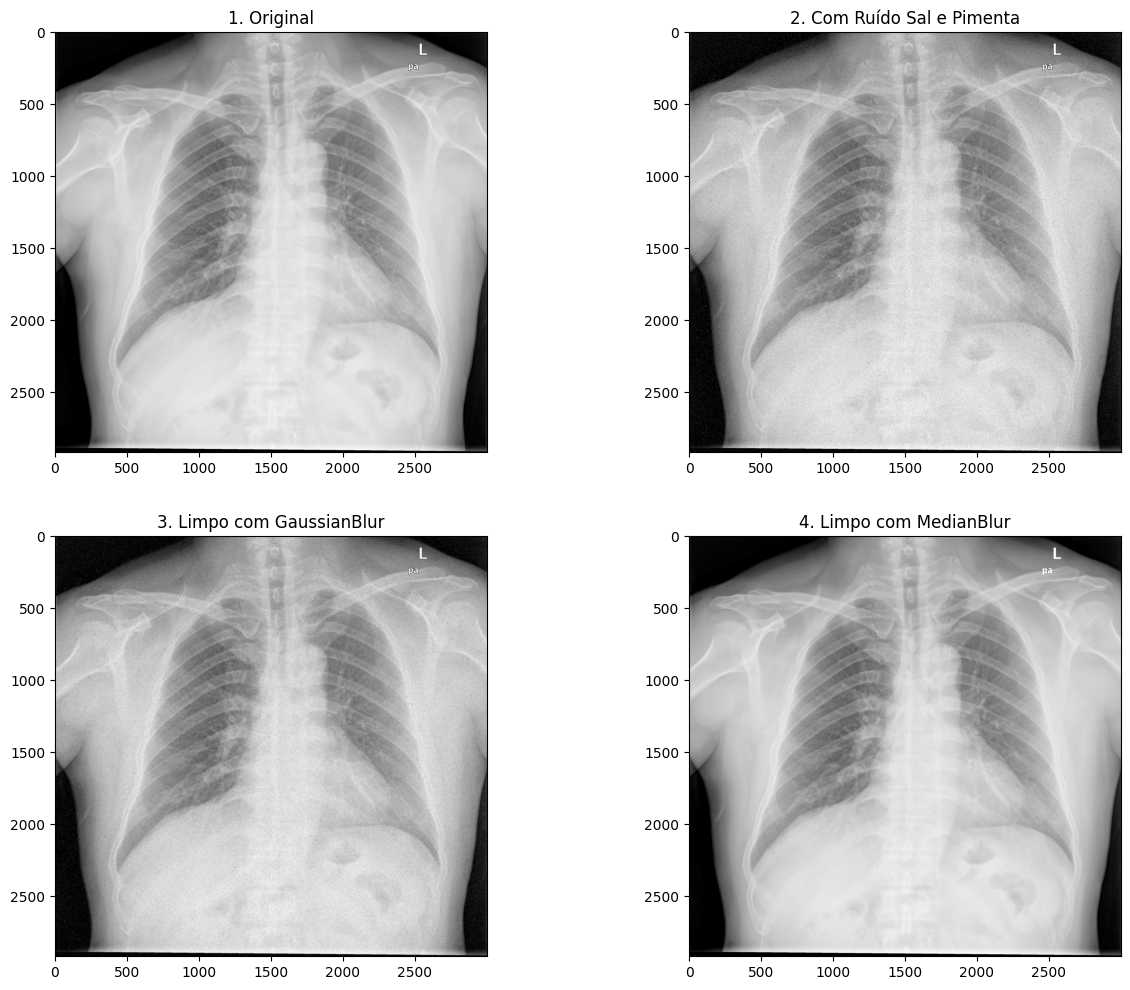

In [59]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('1. Original')

plt.subplot(2, 2, 2)
plt.imshow(noisy_image_sp, cmap='gray')
plt.title('2. Com Ruído Sal e Pimenta')

plt.subplot(2, 2, 3)
plt.imshow(cleaned_gaussian_sp, cmap='gray')
plt.title('3. Limpo com GaussianBlur')

plt.subplot(2, 2, 4)
plt.imshow(cleaned_median_sp, cmap='gray')
plt.title('4. Limpo com MedianBlur')

plt.savefig('../data/processed/analise_filtros_sp.png')

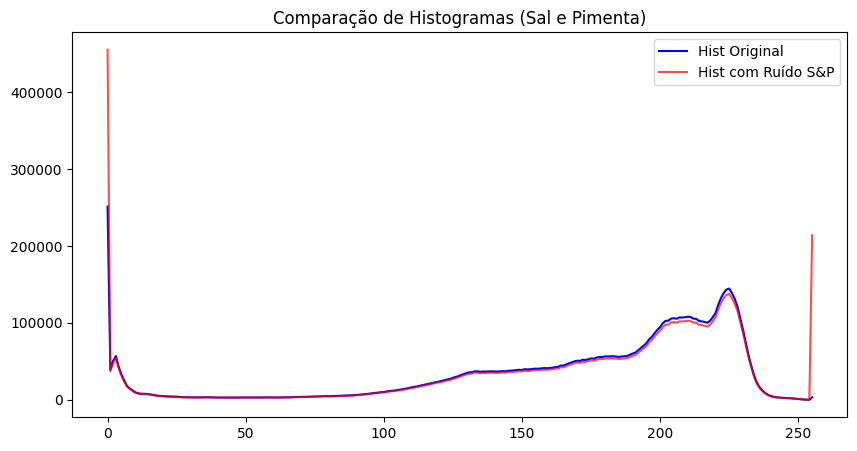

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(hist_original, color='blue', label='Hist Original')
plt.plot(hist_noisy_sp, color='red', alpha=0.7, label='Hist com Ruído S&P')
plt.title('Comparação de Histogramas (Sal e Pimenta)')
plt.legend()
plt.show()

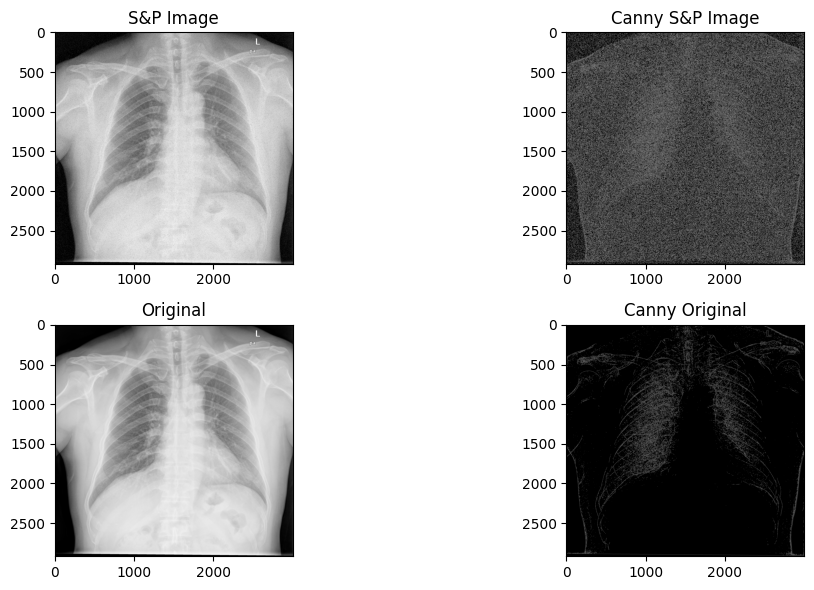

In [61]:
canny_image_noisy = cv2.Canny(noisy_image_sp, 30, 50)
canny_image = cv2.Canny(image, 30, 50)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(noisy_image_sp, cmap='gray')
plt.title('S&P Image')

plt.subplot(2, 2, 2)
plt.imshow(canny_image_noisy, cmap='gray')
plt.title('Canny S&P Image')

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(2, 2, 4)
plt.imshow(canny_image, cmap='gray')
plt.title('Canny Original')

plt.tight_layout()
plt.show()

# CONCLUSÃO
 * É notável a diferença dos histogramas, já que um é mais tênue, ou seja, é mais uniforme (Gaussiano) do que seu original
 * Já o outro, acaba tendo picos nas extremidades como mostra nosso exemplo, contudo, não podemos deixar nos levar a ideias criadas em teoria no suposto "Mundo perfeito". Ademais, no mundo real, os pixels podem varias de 0 a 255, ou seja, nem sempre serão 0 absoluto e nem 255, como mostra nosso exemplo prático.